In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
def vel_components(vel_relative, mass1, mass2):
    specific_vel_relative = vel_relative / (mass1 + mass2)
    return specific_vel_relative * mass2, specific_vel_relative * mass1

## Working in relative coordinates for particles 1 and 2:
### $\mathbf{a} = \mathbf{a}_1 - \mathbf{a}_2$
### $\mathbf{r} = \mathbf{r}_1 - \mathbf{r}_2=(r_x,r_y)$
### $\mathbf{n} = \mathbf{r}/r = \mathbf{n}_{12} = -\mathbf{n}_{21}$


## EOM:
### $\mathbf{a} = \mathbf{r}''(t) = -\frac{ G m }{r^2 (t)} \mathbf{n}(t)$, with $m = M_1  + M_2$
### $r_x''(t) = -\frac{ G m }{(r_x^2 + r_y^2)^{3/2}} r_x $ and $r_y''(t) = -\frac{ G m }{(r_x^2 + r_y^2)^{3/2}} r_y $

## For Python : $y = r_x, r_y, r_x', r_y' =r_x, r_y, v_x, v_y$

In [4]:
def relative_a_component(r_x, r_y, Gm):
    return -Gm*r_x* ((r_x*r_x +r_y*r_y)**(-1.5))

def relative_dynamics(y,t,Gm):
    r_x, r_y, v_x, v_y = y
    dydt = [v_x, v_y, relative_a_component(r_x, r_y, Gm), relative_a_component(r_y, r_x, Gm)]
    return dydt

In [22]:
y0 = [-1, 1, .1, 0.5]
Gm_val = 1
t = np.linspace(0, 10, 101)

In [23]:
from scipy.integrate import odeint
sol = odeint(relative_dynamics, y0, t, args=(Gm_val,))

In [26]:
plt.plot(t, sol[:, 0], label='r_x')
plt.plot(t, sol[:, 1], label='r_y')
plt.plot(t, np.sqrt(sol[:, 10**2..+sol[:, 1]**2.), label='|r|')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

SyntaxError: invalid syntax (<ipython-input-26-e68a028ef308>, line 3)

No handles with labels found to put in legend.


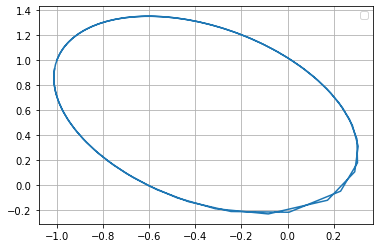

In [25]:
plt.plot(sol[:, 0], sol[:, 1])
plt.legend(loc='best')
plt.grid()
plt.show()